# Билет №13

**1 вопрос (20 баллов)** <br>
Взаимодействие с Excel из Python с помощью XLWings: принципы работы и примеры
использования

----
**Принципы работы XLWings**
* XLWings — это библиотека Python, которая позволяет управлять Microsoft Excel напрямую из Python-кода
* Она использует COM-интерфейс на Windows и AppleScript на Mac, чтобы взаимодействовать с уже запущенным Excel или запускать новый процесс
* Позволяет:
    * читать и записывать данные в ячейки,
    * запускать макросы VBA,
    * форматировать таблицы,
    * работать с книгами, листами, диаграммами и др.
* XLWings удобна для автоматизации рутинных задач, анализа данных и интеграции Python-скриптов с Excel

----
**Основные компоненты XLWings**
* `Book` - объект книги Excel (.xlsx)
* `Sheet` — лист в книге
* `Range` — диапазон ячеек (одна или несколько)
* `App` — объект приложения Excel (управление самим Excel)


------
**Пример на Python**

```python
import xlwings as xw

# Запуск Excel и создание новой книги
app = xw.App(visible=True)       # visible=True — чтобы увидеть Excel окно
wb = app.books.add()             # Создание новой книги
sheet = wb.sheets[0]             # Первый лист

# Запись данных в ячейку A1
sheet.range('A1').value = 'Привет из Python!'

# Запись списка в столбец
sheet.range('A2').value = [10, 20, 30, 40]

# Чтение значения из ячейки
val = sheet.range('A1').value
print(val)  # Выведет: Привет из Python!

# Сохранение книги
wb.save('example.xlsx')

# Закрытие книги и Excel
wb.close()
app.quit()

```


---- 

**Важные моменты**
* Чтобы использовать XLWings, нужно иметь установленный Microsoft Excel.
* На Windows и Mac команды немного отличаются из-за разных систем взаимодействия.
* Можно работать с существующими файлами Excel (открывать и изменять).
* Поддерживается работа с большими объемами данных, удобная интеграция с pandas.

**2 вопрос (20 баллов)** <br>
Загрузите данные из файла 'sp500hst.txt' и обозначьте столбцы в соответствии ссодержимым: \"date\", "\ticker\", "\open\", "\high\", "\lowl\", "\close\", "\volume\". Добавьте столбец с расшифровкой названия тикера, используя данные из файла 'sp_data2.csv' В случае нехватки данных об именах тикеров корректно обработать их

In [613]:
import pandas as pd
import numpy as np

In [742]:
df_hst = pd.read_csv('sp500hst.txt', header=None, names=["date", "ticker", "open", "high", "low", "close", "volume"])

df_names = pd.read_csv('sp_data2.csv')

df_merged = pd.merge(
    df_hst,
    df_names[['ticker', 'name']],
    on='ticker',
    how='left'
)

df_merged['name'] = df_merged['name'].fillna('Unknown')

df_merged.to_csv('merged_sp500_data.csv', index=False)


df_merged.head()

**3 вопрос (20 баллов)** <br>
В файлах 'recipes_sample.csv' и reviews_sample.csv' находится информация об рецептах
блюд и отзывах на эти рецепты соответственно. Загрузите данные из файлов в виде
pd.DataFrame' с названиями 'recipes' и 'reviews'. Обратите внимание на корректное
считывание столбца с индексами в таблице 'reviews (безымянный столбец).

In [618]:
import pandas as pd

In [620]:
recipes = pd.read_csv("data/recipes_sample.csv")
recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


In [622]:
reviews = pd.read_csv("data/reviews_sample.csv", index_col=0)
reviews.head()

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


# Билет №7

**1 вопрос (20 баллов)** <br>
Расстояние Левенштейна: определение, алгоритм эффективного поиска оптимального
редакционного предписания, пример поиска на Python

---
__Расстояние Левенштейна__ (редакционное расстояние, дистанция редактирования) - __минимальное__ количество операций необходимых для превращения одной строки в другую. Рассматриваются следующие операции:
* вставка одного символа
* удаление одного символа 
* замена одного символа на другим.

----
**Поиск оптимального редакционного предписания** <br>
Для восстановления самого преобразования (последовательности операций), дополнительно сохраняют путь выбора минимального шага при заполнении матрицы и потом делают обратный проход.

---


**Пример поиска на Python**


In [626]:
from nltk import edit_distance


print(edit_distance("kitten", "kitchen"))

2


**2 вопрос (20 баллов)** <br>
Решить матричное уравнение $А*Х*В=-С$ - найти матрицу $X$. <br>
<br>
Где $A = \begin{bmatrix}
         -1,2,4\\
         -3,1,2\\
         -3,0,1
         \end{bmatrix}$,
    $B = \begin{bmatrix}
          3,-1\\
          2,1
         \end{bmatrix}$, 
    $C = \begin{bmatrix}
         7, 21\\
         11,8\\
         8,4
         \end{bmatrix}$

In [629]:
import numpy as np

In [631]:
A = np.array([
    [-1,2,4],
    [-3,1,2],
    [-3,0,1]
])

B = np.array([
    [3, -1],
    [2, 1]
])

C = np.array([
    [7, 21],
    [11, 8],
    [8, 4]
])

X = np.dot(np.dot(np.linalg.inv(A),-C), np.linalg.inv(B))

X

array([[ 1.00000000e+00,  5.32907052e-16],
       [-2.00000000e+00,  1.00000000e+00],
       [ 3.00000000e+00, -4.00000000e+00]])

**3 вопрос (20 баллов)** <br>
В файле 'average_ratings.nру' содержится информация о среднем рейтинге 3 рецептов за
период с 01.01.2019 по 30.12.2021. При помощи пакета 'matplotlib' в _одной системе
координат_ (на одной картинке) изобразите три временных ряда, соответствующих
средним рейтингам этих рецептов.

In [634]:
import numpy as np
import matplotlib.pyplot as plt

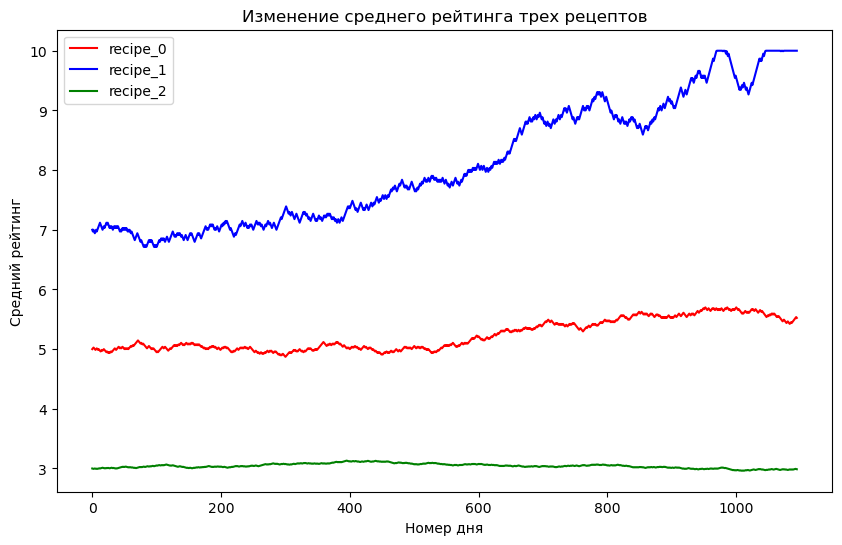

In [636]:
ratings = np.load('data/average_ratings.npy')

plt.figure(figsize=(10, 6))
days = np.arange(ratings.shape[1])
for i in range(3):
    plt.plot(days, ratings[i], label=f"recipe_{i}", color=['red', 'blue', 'green'][i])

plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')
plt.legend()


plt.show()

# Билет №17

**1 вопрос (20 баллов)** <br>
Операция GroupBy в Pandas DataFrame и реализация в ней подхода «разбиение,
применение и объединение»

----
**GroupBy** — это мощный инструмент в библиотеке Pandas для группировки данных по одному или нескольким признакам с последующим применением функций агрегирования, трансформации или фильтрации

---

**Подход «Разбиение, Применение, Объединение» (Split-Apply-Combine)**

Этот концептуальный подход описывает, как работает операция groupby:
* Разбиение (Split): данные разбиваются на группы по одному или нескольким ключам
* Применение (Apply): к каждой группе применяется функция (агрегирующая, трансформирующая или фильтрующая)
* Объединение (Combine): результаты применения функций к группам собираются в один объект (например, DataFrame или Series)

---

**Пример на Python** 

In [641]:
import pandas as pd

data = {
    'Город': ['Москва', 'Москва', 'Санкт-Петербург', 'Санкт-Петербург', 'Казань'],
    'Магазин': ['А', 'Б', 'А', 'Б', 'А'],
    'Продажи': [100, 150, 200, 250, 300]
}

df = pd.DataFrame(data)

grouped = df.groupby('Город')

sales_sum = grouped['Продажи'].sum()

sales_sum

Город
Казань             300
Москва             250
Санкт-Петербург    450
Name: Продажи, dtype: int64

----

**2 вопрос (20 баллов)** <br>
Сгенерировать двухмерный массив `arr`
размерности (4, 7), состоящий из случайных
действительных чисел, равномерно распределенных в диапазоне от 0 до 20.
Нормализовать значения массива с помощью преобразования вида $axes+b$ так, что после
нормализации максимальный элемент массива будет равен 1.0, минимальный 0.0

In [645]:
import numpy as np


arr = np.random.uniform(0, 20, size=(4, 7))

arr_norm = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

print(arr)

[[ 6.32396431  2.30963469  7.20117257  2.96486057 13.30636994 17.19435064
  10.11299603]
 [ 3.90905089  6.46761909 18.60200932 12.94549756  7.21917564 17.48067329
  17.59272475]
 [18.34538872 14.78961041 14.10073397 19.9048311  12.94860874  2.45805188
  10.5279856 ]
 [10.61271928 11.81540565 18.44754521  3.02229401  7.73570997 18.80393234
  19.48772557]]


In [647]:
print(arr_norm)

[[0.22814918 0.         0.27800416 0.03723891 0.62498508 0.84595338
  0.44349385]
 [0.09090073 0.23631361 0.92595583 0.60447537 0.27902735 0.86222616
  0.86859446]
 [0.91137113 0.70928312 0.67013172 1.         0.60465219 0.0084351
  0.46707924]
 [0.47189496 0.54024807 0.91717706 0.04050306 0.3083839  0.93743186
  0.97629435]]


**З вопрос (20 баллов)** <br>
По данным из файла `addres-book-q.xml` сформировать список словарей с телефонами
каждого из людей

In [812]:
from bs4 import BeautifulSoup


with open('data/addres-book-q.xml', 'r', encoding='utf-8') as file:
    xml_content = file.read()


soup = BeautifulSoup(xml_content, 'xml')

people_phones = []


for person in soup.find_all('person'):
    person_data = {
        'name': person.get('name'), 
        'phones': []                
    }
    
    
    for phone in person.find_all('phone'):
        phone_data = {
            'type': phone.get('type'),  
            'number': phone.text       
        }
        person_data['phones'].append(phone_data)
    
    people_phones.append(person_data)


for person in people_phones:
    print(f"Имя: {person['name']}")
    for phone in person['phones']:
        print(f"  Телефон ({phone['type']}): {phone['number']}")
    print()

Имя: Иван Иванов
  Телефон (mobile): +7 123 456-78-90
  Телефон (work): +7 987 654-32-10

Имя: Петр Петров
  Телефон (mobile): +7 555 123-45-67



# Билет №11

**1 вопрос (20 баллов)** <br>
Применение универсальных функций и работа с пустыми значениями в Pandas

-----

**Универсальные функции (ufunc)** — это функции из библиотеки NumPy, которые применяются поэлементно к данным в объектах Series и DataFrame

- Примеры универсальных функций: `np.sqrt`, `np.exp`, `np.log`, `np.abs`, `np.sin`, `np.round` и др.

Пример на Python: 

In [802]:
import pandas as pd
import numpy as np

s = pd.Series([1, 4, 9, 16, np.nan])

result = np.sqrt(s)
print(result)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64


----


**Работа с пустыми значениями (NaN)**

В Pandas отсутствующие значения обозначаются как NaN (Not a Number) — специальное значение, представляющее пропущенные или некорректные данные

**Проверка наличия пропусков:**
```python
df.isna()        # True для NaN
df.isnull()      # То же самое
df.notna()       # True для НЕ NaN
```
**Удаление пустых значений:**

```python
df.dropna()      # Удаляет строки с хотя бы одним NaN
df.dropna(axis=1)  # Удаляет столбцы с NaN
```


**Заполнение пустых значений:**

```python
df.fillna(0)            # Заменить NaN на 0
df.fillna(method="ffill")  # Прямое заполнение (вперёд)
df.fillna(method="bfill")  # Обратное заполнение (назад)

```

---

- Универсальные функции позволяют удобно и эффективно выполнять поэлементные операции.

- Pandas предоставляет удобные средства для:

    - выявления пропущенных данных
    
    * удаления или заполнения NaN
    
    - комбинирования с NumPy-функциями, которые корректно работают с NaN

---

**2 вопрос (20 баллов)** <br>
Файл `minutes_n_ingredients.csv` содержит информацию об идентификаторе рецепта,
времени его выполнения в минутах и количестве необходимых ингредиентов. Считайте
данные из этого файла в виде массива `numpy` типа `int32`, используя `np.loadtxt`.
Выведите на экран первые 5 строк массива

In [655]:
import numpy as np

In [657]:
with open("data/minutes_n_ingredients.csv") as file:
    headers = file.readline().replace("\n", "").split(",")

headers

['id', 'minutes', 'n_ingredients']

In [659]:
arr = np.loadtxt("data/minutes_n_ingredients.csv", delimiter=",", skiprows=1, dtype=np.int32)
arr[:5, :]

array([[127244,     60,     16],
       [ 23891,     25,      7],
       [ 94746,     10,      6],
       [ 67660,      5,      6],
       [162911,     60,     14]], dtype=int32)

**З вопрос (20 баллов)** <br>
По данным файла `steps_sample.xml` сформируйте словарь с шагами по каждому рецепту
вида `{id_рецепта: ["шаг1\", \"шаг2\"]}`. Сохраните этот словарь в файл
`steps_sample.json`

In [831]:
from bs4 import BeautifulSoup
import json


with open('data/steps_sample.xml', 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'xml')
    
recipes = soup.find_all('recipe')

In [832]:
slov_steps = dict()

for recipe in recipes_sp:
    id = recipe.find("id").text
    steps = []
    step_elements = recipe.find_all("step")
    for step in step_elements:
        steps.append(step.text.strip())
    slov_steps[id] = steps

with open("data/steps_sample.json", "w") as file:
    json.dump(slov_steps, file, ensure_ascii=False, indent=4)

# Билет №8

**1 вопрос (20 баллов)** <br>
Задача сериализации и десериализации, описание формата файла JSON и пример
описания данных в этом формате и взаимодействия с ним в Python

----
**Сериализация/Десериализация** 

* Сериализация - это процесс преобразования структуры данных или объекта в формат, пригодный для хранения или передачи
* Десериализация - это процесс преобразования данных, сериализованных в определённом формате, обратно в объекты или структуры данных, которые они представляют

**Цели сериализации:**
* Сохранение состояния объектов
* Передача данных по сети
* Обмен данными между приложениями
* Кэширование


**Формат `JSON` - JavaScript Object Notation**
* JSON — это текстовый формат обмена данными, основанный на синтаксисе JavaScript, но независимый от языка. Он широко используется благодаря своей простоте и читаемости.

Пример JSON: 

```json
{
  "name": "Егор",
  "age": 19,
  "skills": ["Python", "Machine Learning", "Data Analysis"],
  "student": true
}
```

**Работа с JSON в Python**

```python
import json

data = {
    "name": "Егор",
    "age": 21,
    "skills": ["Python", "Machine Learning", "Data Analysis"],
    "student": True
}

# Сериаализация
json_string = json.dumps(data, ensure_ascii=False, indent=2)

with open("data.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

# Десериализация
with open("data.json", "r", encoding="utf-8") as f:
    loaded_data = json.load(f)
```



**2 вопрос (20 баллов)** <br>
По данным файла `steps_sample.xml` сформируйте словарь с шагами по каждому рецепту
вида `{id_рецепта: ["шаг1\", \"шаг2\"]}`. Сохраните этот словарь в файл
`steps_sample.json`

In [836]:
from bs4 import BeautifulSoup
import json


with open('data/steps_sample.xml', 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'xml')
    
recipes = soup.find_all('recipe')

In [837]:
slov_steps = dict()

for recipe in recipes_sp:
    id = recipe.find("id").text
    steps = []
    step_elements = recipe.find_all("step")
    for step in step_elements:
        steps.append(step.text.strip())
    slov_steps[id] = steps

with open("data/steps_sample.json", "w") as file:
    json.dump(slov_steps, file, ensure_ascii=False, indent=4)

**З вопрос (20 баллов)** <br>
В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за
период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в одной системе
координат_ (на одной картинке) изобразите три временных ряда, соответствующих
средним рейтингам этих рецептов.

In [669]:
import numpy as np
import matplotlib.pyplot as plt

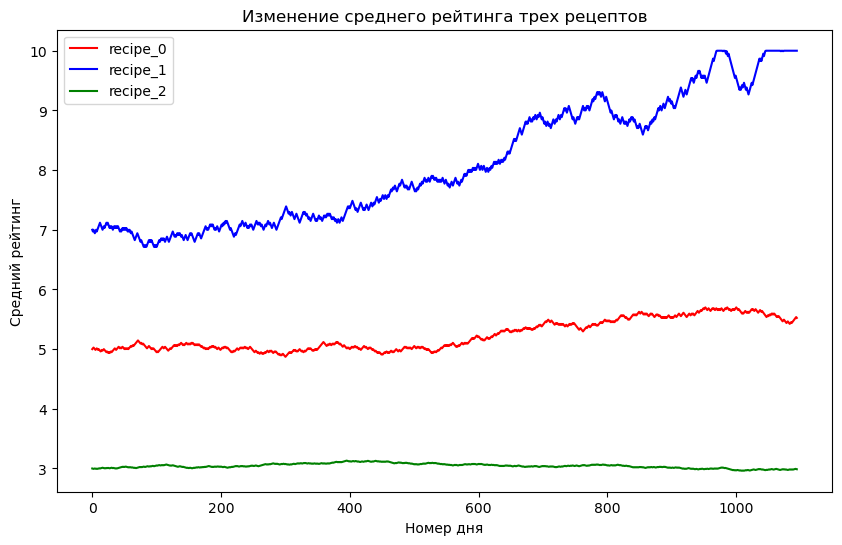

In [671]:
ratings = np.load('data/average_ratings.npy')

plt.figure(figsize=(10, 6))
days = np.arange(ratings.shape[1])
for i in range(3):
    plt.plot(days, ratings[i], label=f"recipe_{i}", color=['red', 'blue', 'green'][i])

plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')
plt.legend()


plt.show()

# Билет №1

**1 вопрос (20 баллов)** <br>
Технологический стек Python для обработки и анализа данных, Python
как glue language, специфика библиотеки NumPy и ее роль в экосистеме Python

----

**Python как glue language:** <br>
Python называют "клеящим языком" благодаря способности легко интегрировать компоненты,
написанные на разных языках программирования. Это достигается через:
* C-расширения (CPython API)
* Биндинги к библиотекам на C/C++/Fortran
* Простой синтаксис для вызова внешних программ


**Основные компоненты стека:**
1. NumPy - базовая библиотека для работы с многомерными массивами
2. Pandas - анализ и манипуляция структурированными данными
3. Matplotlib/Seaborn - визуализация данных
4. SciPy - научные вычисления
5. Scikit-learn - машинное обучение
6. Jupyter - интерактивная разработка

**Специфика NumPy:** <br>
* Производительность: операции выполняются в скомпилированном коде C
* Векторизация: операции применяются ко всему массиву сразу
* Эффективная память: непрерывное размещение данных в памяти
* Основа экосистемы: большинство библиотек использует массивы NumPy
* Роль в экосистеме:
    * NumPy предоставляет единый интерфейс для работы с числовыми данными, что позволяет
различным библиотекам эффективно взаимодействовать друг с другом

----

**2 вопрос (20 баллов)** <br> 
Без непосредственного задания элементов матрицы создать в питру
матрицу 11 на 6 вида: [[1, 2, 4, 7, 8, 9). [I1, 12, 14, 17, 18, 191. [21, 22, 24, 27, 28, 29], .... ,[101,
102, 104, 107, 108, 109]]

In [679]:
import numpy as np


base_row = np.array([1, 2, 4, 7, 8, 9])

matrix = base_row + 10 * np.arange(11).reshape(-1, 1)


print(matrix)

[[  1   2   4   7   8   9]
 [ 11  12  14  17  18  19]
 [ 21  22  24  27  28  29]
 [ 31  32  34  37  38  39]
 [ 41  42  44  47  48  49]
 [ 51  52  54  57  58  59]
 [ 61  62  64  67  68  69]
 [ 71  72  74  77  78  79]
 [ 81  82  84  87  88  89]
 [ 91  92  94  97  98  99]
 [101 102 104 107 108 109]]


**3 вопрос (20 баллов)** <br>
Задайте двумерный массив аг1 размерности, состоящий из случайных
целых чисел в пределах от 0 до 15 размерности (10,8). Получите массив, в котором нечетные
элементы заменены на -1. Решить задачу средствами numpy и/или pandas. Не использовать
циклы и конструкции стандартного Python там, где можно использовать возможности данных
библиотек

In [682]:
import numpy as np

arr1 = np.random.randint(0, 16, size=(10, 8))

arr1

array([[ 6, 10, 10,  5,  1,  2, 14, 10],
       [ 8,  1,  4, 10,  8,  9,  3, 14],
       [11,  3,  7,  8,  7,  9,  4, 13],
       [ 0, 13,  8, 11,  7,  8, 15,  4],
       [ 0,  8, 11, 10,  3,  5,  9, 11],
       [ 1,  5,  3,  5, 13,  5,  0, 15],
       [ 4,  6,  3, 10, 12,  9,  9,  1],
       [11,  7, 10,  2,  3,  1,  0,  1],
       [ 2, 11,  3,  4, 12,  2,  1, 11],
       [11,  0,  5, 14,  1, 14,  4, 14]])

In [684]:
arr1[arr1 % 2 != 0] = -1

arr1

array([[ 6, 10, 10, -1, -1,  2, 14, 10],
       [ 8, -1,  4, 10,  8, -1, -1, 14],
       [-1, -1, -1,  8, -1, -1,  4, -1],
       [ 0, -1,  8, -1, -1,  8, -1,  4],
       [ 0,  8, -1, 10, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  0, -1],
       [ 4,  6, -1, 10, 12, -1, -1, -1],
       [-1, -1, 10,  2, -1, -1,  0, -1],
       [ 2, -1, -1,  4, 12,  2, -1, -1],
       [-1,  0, -1, 14, -1, 14,  4, 14]])

# Билет №12

**1 вопрос (20 баллов)** <br>
Основы работы с регулярными выражениями: базовый синтаксис,
примеры использования модуля re в Python




----
**Что такое регулярные выражения:** <br>
Регулярные выражения (regex) - это мощный инструмент для поиска, сопоставления и
манипуляции текстом на основе шаблонов

----

**Основные метасимволы**

```python
. # любой символ (кроме новой строки)
^ # начало строки
$ # конец строки
* # 0 или более повторений предыдущего символа
+ # 1 или более повторений
? # 0 или 1 повторение (опциональный символ)
\ # экранирование метасимволов
| # логическое ИЛИ
```
----

**Символьные классы** 

```python
[abc] # любой из символов a, b, c
[a-z] # любая строчная буква
[A-Z] # любая заглавная буква
[0-9] # любая цифра
[a-zA-Z] # любая буква
[^abc] # любой символ КРОМЕ a, b, c

# Предопределенные классы
\d # цифра [0-9]
\D # не цифра [^0-9]
\w # буква, цифра или подчеркивание [a-zA-Z0-9_]
\W # не буква, не цифра, не подчеркивание
\s # пробельный символ (пробел, табуляция, новая строка)
\S # не пробельный символ

```
----
**Кванитификаторы**

```python
{n} # точно n повторений
{n,} {n,m} # n или более повторений
# от n до m повторений
{,m} # до m повторений

# Примеры
\d{3} # ровно 3 цифры
\d{2,4} # от 2 до 4 цифр
\d{3,} # 3 или более цифр
[a-z]{1,5} # от 1 до 5 строчных букв
```


-----

**Примеры использоания модуля re**

* Модуль re предоставляет поддержку регулярных выражений в Python - инструмента для поиска, сопоставления и
обработки текстовых данных по шаблона

**Основные функции**

* `re.search(pattern, string)` - поиск первого вхождения
* `re.match(pattern, string)` - проверка с начала строки
* `re.findall(pattern, string)` - все совпадения в виде списка
* `re.sub(pattern, repl, string)` - замена совпадений
* `re.split(pattern, string)` - разделение строки

**Примеры на Python**



In [689]:
import re 

text = "Телефон: +7(495)123-45-67" 
pattern = r"\+7\(\d{3}\)\d{3}-\d{2}-\d{2}" 
result = re.search(pattern, text) 

print(result.group())

+7(495)123-45-67


In [691]:
text = "Цены: 100р, 250р, 75р" 
prices = re.findall(r"\d+", text)

prices

['100', '250', '75']

----

**2 вопрос (20 баллов)** <br> 
Без непосредственного задания элементов матрицы создать в питру
матрицу 11 на 6 вида: [[1, 2, 4, 7, 8, 9], [11, 12, 14, 17, 18, 191. [21, 22, 24, 27, 28, 29], .... ,[101,
102, 104, 107, 108, 109]]

In [695]:
base_row = [1, 2, 3, 4, 5, 6, 7, 8, 9]

matrix = base_row + 10 * np.arange(11).reshape(-1, 1)

matrix

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9],
       [ 11,  12,  13,  14,  15,  16,  17,  18,  19],
       [ 21,  22,  23,  24,  25,  26,  27,  28,  29],
       [ 31,  32,  33,  34,  35,  36,  37,  38,  39],
       [ 41,  42,  43,  44,  45,  46,  47,  48,  49],
       [ 51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 61,  62,  63,  64,  65,  66,  67,  68,  69],
       [ 71,  72,  73,  74,  75,  76,  77,  78,  79],
       [ 81,  82,  83,  84,  85,  86,  87,  88,  89],
       [ 91,  92,  93,  94,  95,  96,  97,  98,  99],
       [101, 102, 103, 104, 105, 106, 107, 108, 109]])

**3 вопрос (20 баллов)** <br>
Постройте кривые синуса, косинуса, тангенса, функции $x^2$ и $x^3$ на четырех графиках в два ряда и два столбца, задайте им разные цвета и стили линий.
Задайте решетку и общий заголовок.

In [698]:
import numpy as np
import matplotlib.pyplot as plt

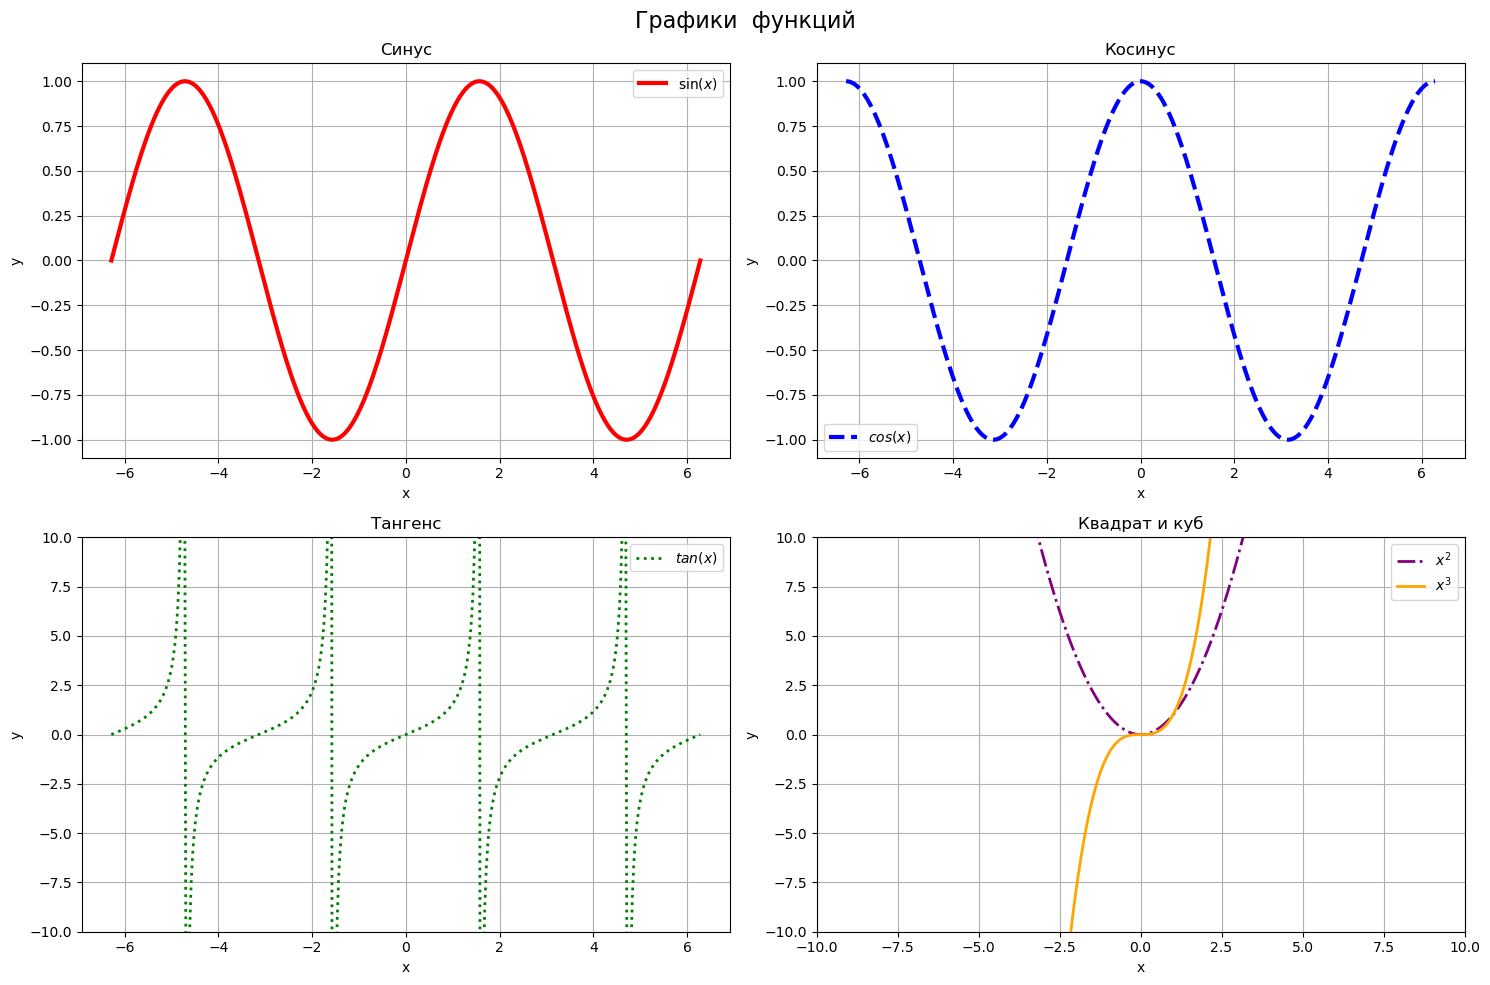

In [700]:
x = np.linspace(-2*np.pi, 2*np.pi, 400)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Графики  функций', fontsize=16)

axes[0, 0].plot(x, np.sin(x), color='red', linestyle='-', linewidth=3, label=r'$\sin(x)$')
axes[0, 0].set_title('Синус')
axes[0, 0].grid(True)
axes[0, 0].legend()


axes[0, 1].plot(x, np.cos(x), color='blue', linestyle='--', linewidth=3, label=r"$cos(x)$")
axes[0, 1].set_title('Косинус')
axes[0, 1].grid(True)
axes[0, 1].legend()


tan_x = []
tan_y = []
for xi in x:
    if np.abs(np.cos(xi)) > 0.01:
        tan_x.append(xi)
        tan_y.append(np.tan(xi))
        
x_tan = x[np.abs(np.cos(x)) > 0.01]
axes[1, 0].plot(tan_x, tan_y, color='green', linestyle=':', linewidth=2, label=r'$tan(x)$')
axes[1, 0].set_title('Тангенс')
axes[1, 0].grid(True)
axes[1, 0].legend()
axes[1, 0].set_ylim(-10, 10)



x_poly = np.linspace(-10, 10, 1000)
axes[1, 1].plot(x_poly, x_poly**2, color='purple', linestyle='-.', linewidth=2, label=r'$x^2$')
axes[1, 1].plot(x_poly, x_poly**3, color='orange', linestyle='-', linewidth=2, label=r'$x^3$')
axes[1, 1].set_title('Квадрат и куб')
axes[1, 1].grid(True)
axes[1, 1].legend()
axes[1,1].set_xlim(-10, 10)
axes[1,1].set_ylim(-10, 10)


for ax in axes.flat:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

# Билет №16

**1 вопрос (20 баллов)** <br> Применение универсальных функций и работа с пустыми значениями в
Pandas

-----

**Универсальные функции (ufunc)** — это функции из библиотеки NumPy, которые применяются поэлементно к данным в объектах Series и DataFrame

- Примеры универсальных функций: `np.sqrt`, `np.exp`, `np.log`, `np.abs`, `np.sin`, `np.round` и др.

Пример на Python: 

In [800]:
import pandas as pd
import numpy as np

s = pd.Series([1, 4, 9, 16, np.nan])

result = np.sqrt(s)
print(result)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64


----


**Работа с пустыми значениями (NaN)**

В Pandas отсутствующие значения обозначаются как NaN (Not a Number) — специальное значение, представляющее пропущенные или некорректные данные

**Проверка наличия пропусков:**
```python
df.isna()        # True для NaN
df.isnull()      # То же самое
df.notna()       # True для НЕ NaN
```
**Удаление пустых значений:**

```python
df.dropna()      # Удаляет строки с хотя бы одним NaN
df.dropna(axis=1)  # Удаляет столбцы с NaN
```


**Заполнение пустых значений:**

```python
df.fillna(0)            # Заменить NaN на 0
df.fillna(method="ffill")  # Прямое заполнение (вперёд)
df.fillna(method="bfill")  # Обратное заполнение (назад)

```

---

- Универсальные функции позволяют удобно и эффективно выполнять поэлементные операции.

- Pandas предоставляет удобные средства для:

    - выявления пропущенных данных
    
    * удаления или заполнения NaN
    
    - комбинирования с NumPy-функциями, которые корректно работают с NaN

---

**2 вопрос (20 баллов)** <br> Загрузите названия рецептов из файла preprocessed_descriptions.csv
(первая колонка). Получите набор уникальных слов в названиях. Получите набор из 5
ближайших слов к слову 'black'. (Близость слов измеряется с помощью расстояния
Левенштейна).

In [706]:
from nltk import edit_distance
from nltk.tokenize import word_tokenize
import pandas as pd
import re


recipes = pd.read_csv("data/recipes_sample.csv")

recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


In [708]:
descriptions = recipes["description"].dropna().str.lower()

words = set()
for word in descriptions:
    tokens = word_tokenize(word)
    words.update(w for w in tokens if re.match(r'^[a-zA-Z]+$', w))

list(words)[:10]

['camino',
 'irish',
 'benny',
 'katie',
 'described',
 'anonymous',
 'jerez',
 'zmail',
 'kiwi',
 'bousel']

In [709]:
def find_closest_words(data, word: str, n=5): 
    result = [(w, edit_distance(word, w)) for w in data]
    return result[:n]

In [710]:
res = find_closest_words(words, "black", 5)
res

[('camino', 6), ('irish', 5), ('benny', 4), ('katie', 5), ('described', 8)]

**3 вопрос (20 баллов)** <br> Задайте двумерный массив аг1 размерности (5, 4), состоящий из
случайных целых чисел в пределах от 0 до 5. Определите, в каких столбцах не менее 2 раз
встречается значение, максимальное по своей строке и распечатайте массив с заменой
элементов остальных столбцов на - 1. Решить задачу средствами numpy и/или pandas. Не
использовать циклы и конструкции стандартного Python там, где можно использовать
возможности данных библиотек.

In [715]:
import numpy as np

ar1 = np.random.randint(0, 6, size=(5, 4))

max_in_rows = np.max(ar1, axis=1, keepdims=True)

max_counts = np.sum(ar1 == max_in_rows, axis=0)

valid_cols = max_counts >= 2

result = np.where(valid_cols, ar1, -1)

print(result)

[[ 4  3 -1 -1]
 [ 2  4 -1 -1]
 [ 3  3 -1 -1]
 [ 5  0 -1 -1]
 [ 4  5 -1 -1]]


# Билет №26

**1 вопрос (20 баллов)** <br>
Форматирование данных в Python, f-строки

----
**F-строки (или форматированные строковые литералы)** — это способ форматирования строк, представленный в Python 3.6+. Они позволяют встраивать переменные и выражения прямо внутрь строки, обрамляя их фигурными скобками {}

Синтаксис: 
```python
name = "Егор"
age = 19
print(f"Меня зовут {name}, мне {age} год.")

```

---

**Преимущества f-строк**

- Краткость и читаемость
- Быстродействие (f-строки быстрее, чем .format() и %)
- Поддержка вычислений и выражений внутри фигурных скобок


Можно управлять точностью, выравниванием, шириной поля, добавлением нулей и т.д: 

----

In [772]:
num = 123.4567

print(f"{num:.2f}")     
print(f"{num:10.2f}")       
print(f"{num:010.2f}")      

123.46
    123.46
0000123.46


In [774]:
name = "Anna"

print(f"{name:>10}")       
print(f"{name:<10}")       
print(f"{name:^10}")       

      Anna
Anna      
   Anna   


---

Вложенные выражения и функции: 

In [777]:
import math
radius = 5
print(f"Площадь круга с радиусом {radius} равна {math.pi * radius**2:.2f}")

Площадь круга с радиусом 5 равна 78.54


----

**2 вопрос (20 баллов)** <br>
Задать два двумерных массива аг1 и ar2 размерности (10, 4), состоящих
из случайных целых чисел в пределах от -5 до 5. Удвоить все значения аг1, которые больше
значений аг2, расположенных на аналогичных позициях, остальные значения сделать равными
0.

In [721]:
import numpy as np

ar1 = np.random.randint(-5, 5, size=(10, 4))
ar2 = np.random.randint(-5, 5, size=(10, 4))


ar1, ar2

(array([[-3,  3, -1,  4],
        [-5, -4,  3,  1],
        [-2,  0,  1,  0],
        [ 4, -4, -2, -3],
        [-5, -1,  2, -2],
        [-1,  0,  2, -3],
        [-4,  0, -3,  2],
        [-1, -5,  2, -3],
        [-5, -5,  1,  2],
        [-2, -5,  1,  4]]),
 array([[-2,  0,  0, -3],
        [ 4, -1,  2, -1],
        [ 1,  0, -4, -1],
        [-5,  2, -5,  4],
        [ 2, -2,  2,  3],
        [ 2, -2, -1, -2],
        [-2, -4,  0,  0],
        [ 0,  1, -1, -1],
        [ 0,  0, -1, -4],
        [ 4,  4,  4, -5]]))

In [723]:
result = np.where(ar1 > ar2, ar1 * 2, 0)
result

array([[ 0,  6,  0,  8],
       [ 0,  0,  6,  2],
       [ 0,  0,  2,  0],
       [ 8,  0, -4,  0],
       [ 0, -2,  0,  0],
       [ 0,  0,  4,  0],
       [ 0,  0,  0,  4],
       [ 0,  0,  4,  0],
       [ 0,  0,  2,  4],
       [ 0,  0,  0,  8]])

**3 вопрос (20 баллов)** <br>
При помощи объединения таблиц, создайте DataFrame, состоящий из
четырех столбцов: id, name, date, review. Рецепты без отзывов должны отсутствовать в данной
таблице. Создайте новый DataFrame, состоящий их записей не старше 2015 года и состоящий
из двух столбцов, где первый это id рецепта, а второй - столбец, хранящий количество отзывов на рецепт

In [726]:
import pandas as pd
from datetime import datetime


recipes = pd.DataFrame(data = {
    'id': [1, 2, 3, 4, 5],
    'name': ['Суп', 'Салат', 'Пирог', 'Рагу', 'Десерт'],
    'date': ['2012-05-10', '2016-08-15', '2014-03-22', '2018-11-30', '2013-07-04']
})

recipes['date'] = pd.to_datetime(recipes['date'])


reviews = pd.DataFrame(data = {
    'id_recipe': [1, 1, 2, 3, 3, 3, 5],
    'review': ['Отличный!', 'Вкусно', 'Нормально', 'Супер', 'Повторил', 'Лучший', 'Не очень']
})

In [728]:
merged_df = pd.merge(recipes, reviews, left_on='id', right_on='id_recipe')
result_df = merged_df[['id', 'name', 'date', 'review']]
result_df = result_df[result_df['date'].dt.year <= 2015]

result_df

,id,name,date,review
0,1,Суп,2012-05-10,Отличный!
1,1,Суп,2012-05-10,Вкусно
3,3,Пирог,2014-03-22,Супер
4,3,Пирог,2014-03-22,Повторил
5,3,Пирог,2014-03-22,Лучший
6,5,Десерт,2013-07-04,Не очень


In [730]:
count = result_df.groupby('id').agg(
    count = ("review", "count")
).reset_index()

final_df = count[['id', 'count']]
final_df.columns = ['id', 'review_count']

final_df

,id,review_count
0,1,2
1,3,3
2,5,1


# Билет №24

**1 вопрос (20 баллов)** <br>
Формат XML и модель DОМ: общая характеристика, пример описания данных в XML и
DOM, работа с ними с помощью библиотеки BeautifulSoup

----

**XML (eXtensible Markup Language):** Расширяемый язык разметки для структурированного представления данных <br>

**Характеристики XML**:
- Иерархическая структура
- Самоописывающийся формат
- Поддержка атрибутов и пространств имен
- Строгий синтаксис

----

**Модель DOM (Document Object Model)**

DOM представляет XML-документ как древовидную структуру объектов в памяти

**Компоненты DOM:**
- **Узлы** (nodes): элементы, атрибуты, текст
- **Элементы** (elements): теги XML
- **Атрибуты** (attributes): свойства элементов
- **Дерево**: иерархическая структура

----

Библиотека **BeautifulSoup** (обычно используется для HTML), также поддерживает работу с XML, реализуя DOM-модель:

In [795]:
from bs4 import BeautifulSoup

xml_data = """
<students>
    <student id="1">
        <name>Егор</name>
        <age>19</age>
        <course>Machine Learning</course>
    </student>
    <student id="2">
        <name>Анна</name>
        <age>22</age>
        <course>Data Science</course>
    </student>
</students>
"""

soup = BeautifulSoup(xml_data, "xml")


students = soup.find_all("student")

for student in students:
    name = student.find("name").text
    course = student.find("course").text
    student_id = student['id']
    print(f"ID: {student_id} -> {name} изучает {course}")

ID: 1 -> Егор изучает Machine Learning
ID: 2 -> Анна изучает Data Science


---

**2 вопрос (20 баллов)** <br>
Решить матричное уравнение $А*Х*В=-С$ - найти матрицу $X$. <br>
<br>
Где $A = \begin{bmatrix}
         -1,2,4\\
         -3,1,2\\
         -3,0,1
         \end{bmatrix}$,
    $B = \begin{bmatrix}
          3,-1\\
          2,1
         \end{bmatrix}$, 
    $C = \begin{bmatrix}
         7, 21\\
         11,8\\
         8,4
         \end{bmatrix}$

In [737]:
import numpy as np


A = np.array([
    [-1,2,4],
    [-3,1,2],
    [-3,0,1]
])

B = np.array([
    [3, -1],
    [2, 1]
])

C = np.array([
    [7, 21],
    [11, 8],
    [8, 4]
])

X = np.dot(np.dot(np.linalg.inv(A),-C), np.linalg.inv(B))

X

array([[ 1.00000000e+00,  5.32907052e-16],
       [-2.00000000e+00,  1.00000000e+00],
       [ 3.00000000e+00, -4.00000000e+00]])

**З вопрос (20 баллов)** <br>
В файле 'average ratings.npy содержится информация о среднем рейтинге 3 рецептов за
период с 01.01.2019 по 30.12,2021. При помощи пакста 'matplotlib и _одной системе
коорлинат_ (на одной картинке) изобразите три временных ряда, соответствующих
средним рейтингам этих рецептов.

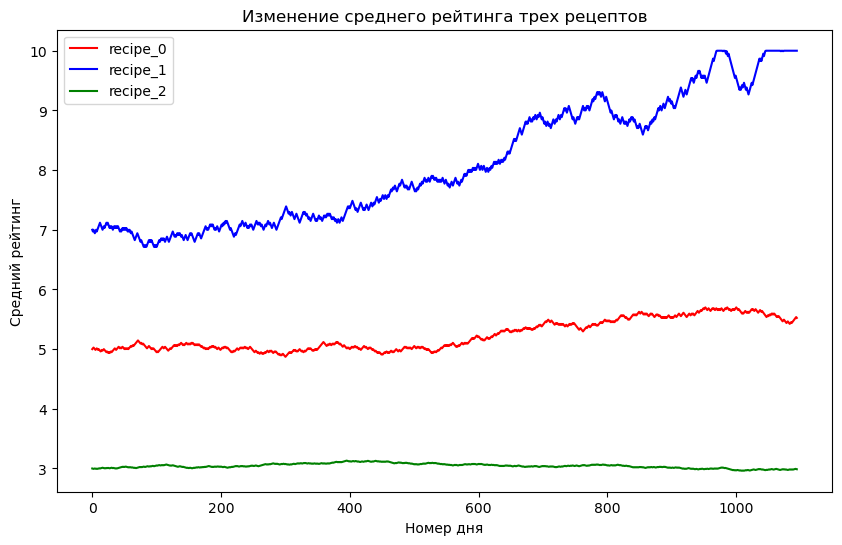

In [840]:
import numpy as np
import matplotlib.pyplot as plt

ratings = np.load('data/average_ratings.npy')

plt.figure(figsize=(10, 6))
days = np.arange(ratings.shape[1])
for i in range(3):
    plt.plot(days, ratings[i], label=f"recipe_{i}", color=['red', 'blue', 'green'][i])

plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')
plt.legend()


plt.show()

2. (20 баллов) Задан двухмерный массив arl размерности (25, 4), состоящий из
случайных целых чисел в пределах от 0 до 15. Определить, в каких столбцах не
менее 5 раз встречается значение, максимальное по своей строке (вывести индексы
этих столбцов на экран с соответствующим комментарием). Для столбца, в котором
таких значений наибольшее количество заменить максимумы по строке на значения
-1.
pandas. He
Решить задачу средствами питру и/или pandas. Не использовать циклы и
конструкции стандартного Python там, где можно использовать возможности
данных библиотек.

In [871]:
import numpy as np
import pandas as pd


arr = np.random.randint(0, 16, size=(25, 4))


max_in_rows = arr.max(axis=1, keepdims=True)


is_max = arr == max_in_rows


max_counts = is_max.sum(axis=0)

# Находим столбцы, где максимумов >= 5
columns_with_5max = np.where(max_counts >= 5)[0]
print(f"Столбцы, где максимум по строке встречается не менее 5 раз: {columns_with_5max}")

# Находим столбец с наибольшим количеством максимумов
if len(columns_with_5max) > 0:
    max_col = max_counts.argmax()
    print(f"Столбец с наибольшим количеством максимумов: {max_col}")
    
    # Заменяем максимумы по строкам в этом столбце на -1
    arr[is_max[:, max_col], max_col] = -1
    
    print("Массив после замены:")
    print(arr)
else:
    print("Нет столбцов, удовлетворяющих условию")

Столбцы, где максимум по строке встречается не менее 5 раз: [0 1 2 3]
Столбец с наибольшим количеством максимумов: 1
Массив после замены:
[[10  1 15  1]
 [ 2  2  6  1]
 [ 0 -1  2  7]
 [ 5 -1  5  3]
 [ 3 -1 13  3]
 [ 4  0 14 13]
 [ 1  1 12  6]
 [ 8 -1  4  1]
 [ 5  4 10  9]
 [ 0 -1  1  4]
 [ 7  5  2  7]
 [ 3  6 12  6]
 [10 -1  0  7]
 [ 9 -1  8  8]
 [12  1  5 15]
 [ 3  7 15  0]
 [ 6 -1  2 13]
 [ 0 -1  3  0]
 [15 14 10  6]
 [10  0  8 10]
 [13  8  5  3]
 [ 0  7  4 10]
 [ 2 -1  0  0]
 [13 11  3 11]
 [ 1  0  3  1]]
